In [1]:
%autosave 0

Autosave disabled


In [2]:
!pip install nengo

<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 14px; 
            font-weight: 500;
            padding: 30px 5px 30px 5px; 
            border: 30px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>(Custom CSS files are not reliable for controlling Jupyter font style. To establish the same appearance as the original notebook, depend on the browser to control the font, by setting the desired font faces in the browser settings. For example, Chrome 135 or Firefox 134 can do this. In this notebook series, Bookerly font is for markdown and Monaco is for code.)
     
     
     

</font>                 
</div>

<div style="background: #DDE2FF;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 20px 5px 20px 5px; 
            border: 30px solid #DDE2FF; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>**Chapter 31-16: PDEs Solvers Using Neural Network Methods** 
 
PDE study considered from the viewpoint of neural networks. Many PDEs describe the evolution of a spatially distributed system over time. The state of such a system is defined by a value $v(x,t)$ that depends on a spatial variable $x$ that is usually a vector and on time $t$. The value itself can be a vector as well.

"Learning samples" can consist of discrete values of the initial condition $v_{i,0}(x_{i,0})$ and values $v_{ij}(x_i,t_j)$ at later times. The initial values are presented to the network as inputs. The outputs of the (recurrent) network at later times $t_j$ are then compared with the sample values to calculate the error.

Since PDEs are often spatially homogeneous, it makes sense to use recurrent convolutional networks here. This is the same type that is often used in image processing.

The size of the convolutional kernel depends on the degree of spatial derivatives in the PDE:

The network needs to have at least one layer for each component of the value $v$. Additional hidden layers might be required, especially if the PDE has higher temporal derivatives.
     
     
     

</font>                 
</div>

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The example in the cell below was taken from the Github repository,  <MatthewFilipovich /
neural-network-pde-solver> . Besides this 1D heat equation example, examples for 2D heat and 1D wave are also contained there. Neural network PDE solving is a very active area, with lots of participants, and new solvers are coming out at a fast pace.

In this particular example, Mr. Filipovich has elected to show plots from new and older methods for comparison. (The 2nd plot shows a straight line, but if you look closely at the 5th plot, which is its companion, you will see that its line is not quite straight.)

The nengo_pde module is not hosted on Pypi, and cannot be installed by pip. But due to the presence of the **\__init__.py** file in the module folder, placing the folder in the Jupyter home directory allows the nengo_pde module to be imported without difficulty into a Jupyter cell. (It is, however, necessary to install the nengo module from Pypi.)
     
     
     

</font>                 
</div>

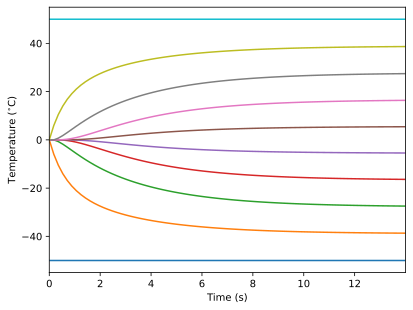

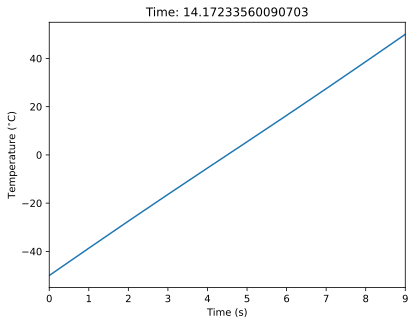

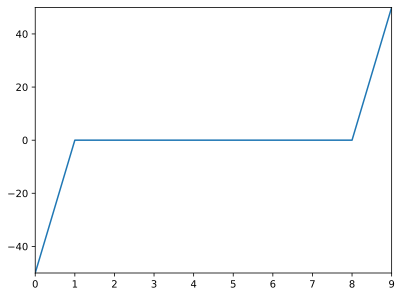

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

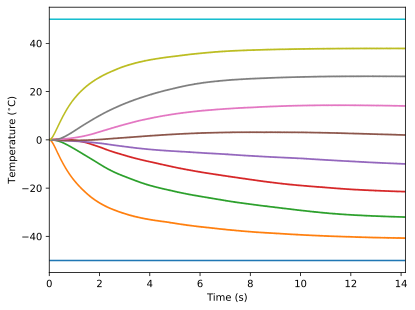

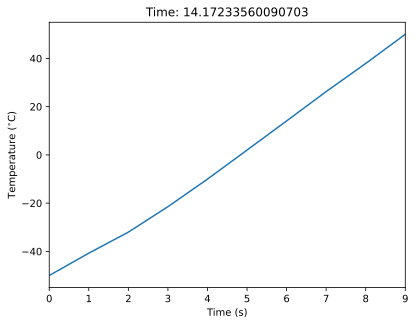

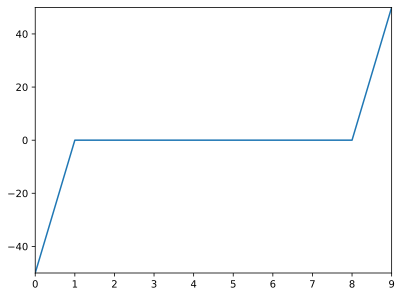

In [14]:
"""Module solves heat equation in 1D using finite difference method and nengo_pde."""
from nengo_pde import Solver1D
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']


def feedback_connection(u):
    return - (K/dx**2) * 2*u


def lateral_connection(u):
    return K/dx**2 * u


# Nengo simulation
t_steps = 80  # Number of time steps
x_steps = 8  # Number of x steps
neurons = 500  # Number of neurons
radius = 100  # Radius of neurons
boundaries = [-50, 50]  # Constant boundary conditions
solver = Solver1D(feedback_connection, lateral_connection)

# Grid properties
K = 4.2
x_len = 20  # mm
dx = x_len/x_steps
dt = dx**2/(2*K**2)  # dt chosen for stability

# Run finite difference method simulation
solver.run_FDM_order1(dt, t_steps, x_steps, boundaries)
fig, ax = solver.plot_population(dt, False)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Temperature ($^{\circ}$C)')
plt.show()
fig, ax = solver.plot_grid(t_steps, False)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Temperature ($^{\circ}$C)')
plt.show()
solver.animate(nframes=t_steps)

# Run nengo_pde simulation
solver.run_nengo_order1(dt, t_steps, x_steps, boundaries, neurons, radius)
fig, ax = solver.plot_population(0.001, False)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Temperature ($^{\circ}$C)')
plt.show()
fig, ax = solver.plot_grid(t_steps, False)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Temperature ($^{\circ}$C)')
plt.show()
solver.animate(nframes=t_steps)
















<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>There is an interesting paper with the title: _Variational Monte Carlo Approach to Partial Differential Equations with Neural Networks_, available on the **arXiv** eprint site under the name arXiv:2206.01927v2. (Because it deals with both Monte Carlo as well as Neural Networks, the work could be referred to either of two of these pde notebooks.) The Github repository for the project is RehMoritz\/vmc\_pde.<br><br>

The following instructions for getting a Jupyter notebook working on Windows are not currently feasible due to the flatline status of the web address. The address
https://storage.googleapis.com/jax-releases/jax_releases.html is the site of last resort for versions of jaxlib, but now the earliest windows version available is 0.4.13. No substitute site is known to me, unfortunately.

1. From the site: https://<br>
whls.blob.core.windows.net/unstable/index.html download one of the following versions of Jaxlib,<br>
cpu/jaxlib-0.1.75-cp37-none-win_amd64.whl<br>
cpu/jaxlib-0.1.75-cp38-none-win_amd64.whl<br>
cpu/jaxlib-0.1.75-cp39-none-win_amd64.whl<br>
the choice depending on whether Python 3.7, 3.8, or 3.9 is available for use. Place the downloaded file in the Jupyter working directory.<br>
2. Install the jaxlib file, from within Jupyter, with the command !pip3 install jaxlib-0.1.75-cp39-none-win_amd64.whl.<br>
3. Install the module flax, from within Jupyter, with the command !pip3 install flax==0.3.6.<br>
4. If a version of jax is installed, uninstall it or delete the site-package.<br>
5. If action was taken in 4. above, a kernel restart is probably called for.<br>
6. Install the module jax, from within Jupyter, with the command !pip3 install jax==0.2.18. Pip should do the install in spite of a slight disagreement concerning dependencies.<br>
7. Download the zipped version of the repository and extract it, resulting in **vmc\_pde-main**. From the subdirectory 'vmc_fluids', find 13 local modules (excluding 'main.py'). Copy these modules to the working directory of Jupyter.<br>
8. Open the file $\:\:\textsf{main.py}\:\:$ in Idle or wherever, then copy it to a Jupyter cell. The file should run, producing extensive printed data and seven time-sequence plots. The main program is shown below, but not run here. Instead, three of the plots are shown below it.<br>

For Linux, the situation is better, because the linux wheels are still available. The whole situation is treated in the Github repository with the name whiffee/Jupyter_caveman.
     
     
     

</font>                 
</div>

In [ ]:
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
import flax.linen as nn
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import os
import time

import global_defs
import var_state
import sampler
import net
import grid
import train
import evolutionEq
import tdvp
import stepper
import visualization
import mpi_wrapper
import util


def norm_fun(v, S):
    # norm_fun for the timesteps
    return v @ S @ v


# Initializing the net
initKey = 1
sampleKey = 1

mode_dict = {"fluidpaper": {"offset": jnp.ones(2) * 0.25, "dim": 2, "latent_space_name": "cos_dist", "mcmcbound": 0.25, "gridbound": 1., "symgrid": False, "evolution_type": "advection_paper"},
             "harmonicOsc": {"offset": jnp.ones(2) * 1, "dim": 2, "latent_space_name": "Gauss", "mcmcbound": 0.25, "gridbound": 8., "symgrid": True, "evolution_type": "advection_hamiltonian"},
             "harmonicOsc_diff": {"offset": jnp.array([1, 0, 0, 1, 0, 0]) * 1, "dim": 6, "latent_space_name": "Gauss", "mcmcbound": 0.25, "gridbound": 8., "symgrid": True, "evolution_type": "advection_hamiltonian_wDiss"},
             "diffusion": {"offset": jnp.zeros(8), "dim": 8, "latent_space_name": "Student_t", "mcmcbound": 0.25, "gridbound": 10., "symgrid": True, "evolution_type": "diffusion"},
             "diffusion_anisotropic": {"offset": jnp.zeros(12), "dim": 12, "latent_space_name": "Gauss", "mcmcbound": 0.25, "gridbound": 10., "symgrid": True, "evolution_type": "diffusion_anisotropic"},
             "mwe": {"offset": jnp.zeros(2), "dim": 2, "latent_space_name": "Gauss", "mcmcbound": 0.25, "gridbound": 10., "symgrid": True, "evolution_type": "diffusion"}}
mode = "harmonicOsc_diff"
mode = "diffusion"
mode = "mwe"

"""
List of things that have to be set manually before starting a run:
- parameter nu of the student - t in BOTH (!!) sampler.py and net.py - starts with nu=2 atm.
- network specifications, whether to use both s and t, etc.
    - Diffusion: noAdd
    - harmonicOsc: DifferentAdd
- timestep:
    - Diffusion: dt = 1e-7, fixed, with increasing step size, factor:, maxStep:
    - harmonicOsc: dt=1e-4, fixed, with increasing step size, factor: 1.3, maxStep: 1e-2
- blocks:
    - Diffusion:: 4, intmediate (dim//2)
    - harmonicOsc: 4, intmediate (dim // 2)
- latent space covariance matrix:
    - Diffusion: np.eye(..) + A @ A.T
    - harmonicOsc: L @ L.T
"""

dim = mode_dict[mode]["dim"]
offset = mode_dict[mode]["offset"]
mcmcbound = mode_dict[mode]["mcmcbound"]
gridbound = mode_dict[mode]["gridbound"]
symgrid = mode_dict[mode]["symgrid"]
latent_space_name = mode_dict[mode]["latent_space_name"]
evolution_type = mode_dict[mode]["evolution_type"]

# set up sampler
sampler = sampler.Sampler(dim=dim, numChains=30, name=latent_space_name, mcmc_info={"offset": offset, "bound": mcmcbound})

# set up variational state
print("Identifier -3")
vState = var_state.VarState(sampler, dim, initKey, 4, network_args={"intmediate": (dim // 2,) * 1, "offset": offset, "latentSpaceName": latent_space_name, "dim": dim})
print(f"Number of Model parameters: {vState.numParameters}")


# Some (old) sanity checks - can be removed
mynet = {"net": vState.net, "params": vState.params}
x_real = jnp.ones(dim)
print(mynet["params"])
z_latent, _ = mynet["net"].apply(mynet["params"], x_real, evaluate=False, inv=False)
x_real, _ = mynet["net"].apply(mynet["params"], z_latent, evaluate=False, inv=True)
print(z_latent)
print(x_real)

x_real = - jnp.ones(dim)
z_latent, jac = mynet["net"].apply(mynet["params"], x_real, evaluate=False, inv=False)
x_real, jac_inv = mynet["net"].apply(mynet["params"], z_latent, evaluate=False, inv=True)
print(z_latent)
print(x_real)

x_real = jnp.zeros(dim)
z_latent, jac = mynet["net"].apply(mynet["params"], x_real, evaluate=False, inv=False)
x_real, jac_inv = mynet["net"].apply(mynet["params"], z_latent, evaluate=False, inv=True)
print(z_latent)
print(x_real)


# Initializing the grid
if dim == 2:
    bounds = np.ones((dim,)) * gridbound
    n_gridpoints = 200
    grid = grid.Grid(bounds, n_gridpoints, sym=symgrid)
    integral = vState.integrate(grid)
    print("Integral value:", integral)

# time evolution
dt = 1e-7
tol = 1e-2
maxStep = 1e-2
comp_integrals = False
# myStepper = stepper.AdaptiveHeun(timeStep=dt, tol=tol, maxStep=maxStep)
myStepper = stepper.FixedStepper(timeStep=dt, mode='Heun', maxStep=maxStep, increase_fac=1.3)
tdvpEq = tdvp.TDVP()
timings = util.Timings()
evolutionEq = evolutionEq.EvolutionEquation(dim=dim, name=evolution_type)
nSamplesTDVP = 10000
nSamplesObs = 10000

# data to learn a specific state
# std_dev = 1
# size = (1, 1000, dim)
# mode = "standard_normal"
# data, target_fun = train.gen_data(size, mode=mode, std=std_dev)
# net = train.train(vState, data, grid, lr=1e-3, batchsize=100, target_fun=target_fun, epoches=200)

wdir = "output/" + mode + f"/NsamplesTDVP{nSamplesTDVP}_NsamplesObs{nSamplesObs}_T10/"
wdir = "output/" + mode + f"/NsamplesTDVP{nSamplesTDVP}_NsamplesObs{nSamplesObs}/"
wdir = "output/" + mode + f"/NsamplesTDVP{nSamplesTDVP}_NsamplesObs{nSamplesObs}_Tdifferent/"
wdir = "output/" + mode + f"/test_NsamplesTDVP{nSamplesTDVP}_NsamplesObs{nSamplesObs}_maxStep{maxStep}/"
if mpi_wrapper.rank == 0:
    try:
        os.makedirs(wdir)
    except OSError:
        print("Creation of the directory %s failed" % wdir)
    else:
        print("Successfully created the directory %s " % wdir)

t = 0
t_end = 5
plot_every = 1e0

if dim == 2:
    # visualization.plot_vectorfield(grid, evolutionEq)
    # plt.savefig(wdir + 'vectorfield.pdf')
    # plt.show()

    visualization.plot(vState, grid, proj=False)
    plt.savefig(wdir + f't_{t:.3f}.pdf')
    plt.show()

    # states = vState.sample(2000000)
    # visualization.plot_data(states, grid, title='Samples')
    # plt.show()


infos = {"times": [], "ev": [], "snr": [], "solver_res": [], "tdvp_error": [], "dist_params": []}
n_list = []
while t < t_end + dt:
    t1 = time.perf_counter()
    dp, dt, info = myStepper.step(0, tdvpEq, vState.get_parameters(), evolutionEq=evolutionEq, psi=vState, nSamplesTDVP=nSamplesTDVP, nSamplesObs=nSamplesObs, normFunction=norm_fun, timings=timings, integrals=comp_integrals)
    vState.set_parameters(dp)
    infos["times"].append(t)

    print(f"t = {t:.3f}, dt = {dt:e}")
    print("\t Timings:")
    timings.print_timings()
    print(f"\t Total (in main.py): {time.perf_counter() - t1}")

    print("\t Data:")
    print(f"\t > Solver Residual = {tdvpEq.solverResidual}")
    print(f"\t > TDVP Error = {tdvpEq.tdvp_error}")
    if comp_integrals:
        print(f"\t > Integral 1sigma = {info['integral_1sigma']}")
        print(f"\t > Integral 0.5sigma = {info['integral_0.5sigma']}")
        print(f"\t > Integral 0.1sigma = {info['integral_0.1sigma']}")
    print(f"\t > Entropy = {info['entropy']}")
    print(f"\t > dist params = {vState.params['params']['dist_params']}")
    print(f"\t > Means = {info['x1']}")
    print(f"\t > Covar = {info['covar']}")

    for key in info.keys():
        if key not in infos.keys():
            infos[key] = []
        infos[key].append(info[key])
    infos["ev"].append(tdvpEq.ev)
    infos["snr"].append(tdvpEq.snr)
    infos["solver_res"].append(tdvpEq.solverResidual)
    infos["tdvp_error"].append(tdvpEq.tdvp_error)
    infos["dist_params"].append(vState.params['params']['dist_params'])

    n = round(t / plot_every)
    if np.abs(t - n * plot_every) < dt and dim == 2 and n not in n_list:
        n_list.append(n)
        integral = vState.integrate(grid)
        print("Integral value:", integral)

        visualization.plot(vState, grid, proj=False)
        plt.savefig(wdir + f't_{t:.3f}.pdf')
        plt.show()

    print(vState.net.apply(vState.params, jnp.zeros(dim,), evaluate=False, inv=True)[0])

    # visualization.plot_line(vState, scale=10, fit=True, offset=offset)
    # plt.show()

    t = t + dt

util.store_infos(wdir, infos)
visualization.make_final_plots(wdir, infos)
plt.show()



<img src="image01.svg" />

<div style="background: #E2FFCC;
            font-family: Bookerly;
            font-size: 16px; 
            font-weight: 500;
            padding: 10px 5px 10px 5px; 
            border: 30px solid #E2FFCC; 
            margin-left: 1px;
            margin-right: 1px;"

<font color='blue'>The paper describes the method as applicable to diffusion, i.e. parabolic, problem environments. Because elliptic equations are also amenable to solution by Monte Carlo techniques, it might be possible to extend the treatment to them also.
     
     
     

</font>                 
</div>